# Predicting Choice of Contraceptive Method for Indonesian Women

## Contraceptive Method Choice Data Set

Dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. In which we are predicting that basis on some given feature which contraceptive method will be chosen by a women.

## Description of Data

This dataset is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of interview. The problem is to predict the current contraceptive method choice (no use, long-term methods, or short-term methods) of a woman based on her demographic and socio-economic characteristics.

Attribute Information:

1. Wife's age (numerical) 
2. Wife's education (categorical) 1=low, 2, 3, 4=high 
3. Husband's education (categorical) 1=low, 2, 3, 4=high 
4. Number of children ever born (numerical) 
5. Wife's religion (binary) 0=Non-Islam, 1=Islam 
6. Wife's now working? (binary) 0=Yes, 1=No 
7. Husband's occupation (categorical) 1, 2, 3, 4 
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high 
9. Media exposure (binary) 0=Good, 1=Not good 
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

Supervised problem: we are given both the features and the target. During training, we want the model to learn the relationship between the features and the score so we give it both the features and the answer. Then, to test how well the model has learned, we evaluate it on a testing set where it has never seen the answers!

In [99]:
#Default Packages 

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Graphics in SVG format are more sharp and legible

# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'

In [100]:
#Packages for preprocessing,EDA & modelling

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn.metrics import confusion_matrix as cm #for checking the model performance
from sklearn.metrics import accuracy_score as As #for checking the model accuracy
from sklearn.metrics import precision_score as ps #for checking the model precision
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
from sklearn.ensemble import RandomForestClassifier # for Random forest
from sklearn.svm import SVC #for Support Vector Machine (SVM) classification Algorithm
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning

In [156]:
# Setting up directory
#os.chdir(r'/Users/harsh/Desktop/Data sets')

#Importing file through pandas
Contraceptive_choice_method=pd.read_table('./cmc.data',delimiter=',',header=None)
cmc=Contraceptive_choice_method.copy()

In [157]:
#renaming the columns
cmc.columns=['wife_age','wife_edu ','Husband_edu','no._child_bron','wife_religion ',
'wife_now_working',
'husband_occup', 
'sol_index', 
'media_exposure',
'Cont_Methd_used']

In [141]:
#Exploring the dataset

cmc.shape
cmc.info()
cmc.head()
cmc.columns
cmc.describe()

(1473, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
wife_age            1473 non-null int64
wife_edu            1473 non-null int64
Husband_edu         1473 non-null int64
no._child_bron      1473 non-null int64
wife_religion       1473 non-null int64
wife_now_working    1473 non-null int64
husband_occup       1473 non-null int64
sol_index           1473 non-null int64
media_exposure      1473 non-null int64
Cont_Methd_used     1473 non-null int64
dtypes: int64(10)
memory usage: 115.2 KB


,wife_age,wife_edu,Husband_edu,no._child_bron,wife_religion,wife_now_working,husband_occup,sol_index,media_exposure,Cont_Methd_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


Index(['wife_age', 'wife_edu ', 'Husband_edu', 'no._child_bron',
       'wife_religion ', 'wife_now_working', 'husband_occup', 'sol_index',
       'media_exposure', 'Cont_Methd_used'],
      dtype='object')

,wife_age,wife_edu,Husband_edu,no._child_bron,wife_religion,wife_now_working,husband_occup,sol_index,media_exposure,Cont_Methd_used
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


Text(0.5,1,'Missing values in the dataset')

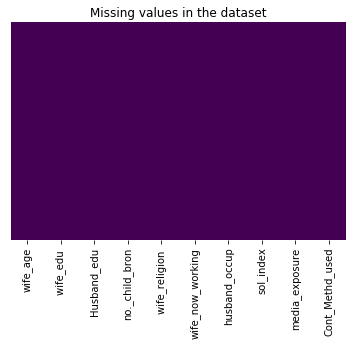

In [142]:
# Heat Map for Checking for Missing values
sns.heatmap(cmc.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing values in the dataset')

There are no null values in data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20c4a400>,
      dtype=object)

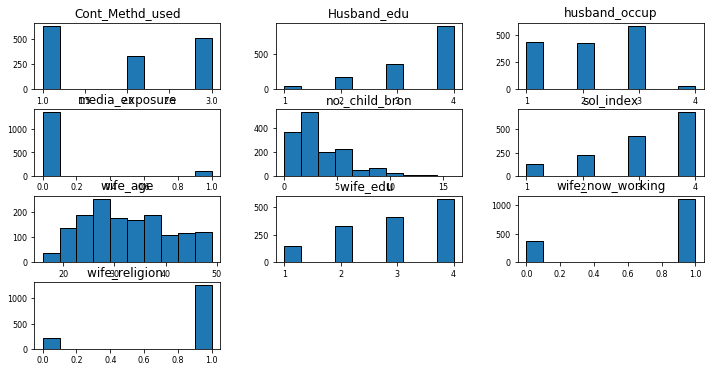

In [143]:
# looking over how different features are distributed in data
cmc.hist(edgecolor='black',grid=False,xlabelsize=8,ylabelsize=8)
fig=plt.gcf()
fig.set_size_inches(12,6)

In [158]:
#husband_occup is a categorical (may be nominal) variable with multiple classes, so get dummies for the variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df
create_dummies(cmc, 'husband_occup')

,wife_age,wife_edu,Husband_edu,no._child_bron,wife_religion,wife_now_working,sol_index,media_exposure,Cont_Methd_used,husband_occup_1,husband_occup_2,husband_occup_3,husband_occup_4
0,24,2,3,3,1,1,3,0,1,0,1,0,0
1,45,1,3,10,1,1,4,0,1,0,0,1,0
2,43,2,3,7,1,1,4,0,1,0,0,1,0
3,42,3,2,9,1,1,3,0,1,0,0,1,0
4,36,3,3,8,1,1,2,0,1,0,0,1,0
5,19,4,4,0,1,1,3,0,1,0,0,1,0
6,38,2,3,6,1,1,2,0,1,0,0,1,0
7,21,3,3,1,1,0,2,0,1,0,0,1,0
8,27,2,3,3,1,1,4,0,1,0,0,1,0
9,45,1,1,8,1,1,2,1,1,0,1,0,0


In [198]:
##Separating the Independent and Dependent Variables
x=cmc.drop('Cont_Methd_used', axis=1).values
y=cmc[['Cont_Methd_used']].values

In [199]:
#feature scaling (or standardization) for independent variables
sc = StandardScaler()
x = sc.fit_transform(x)

In [200]:
# Split into training and test set
# 80% of the input for training and 20% for testing

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,random_state=20)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(1178, 9) (1178, 1)
(295, 9) (295, 1)


## Logistic Regression

In [183]:
# LR model without hyperparameter tuning
lr=LogisticRegression(multi_class='multinomial',solver='saga',random_state=30)
lr.fit(x_train,y_train)
lr_b_hpt=lr.score(x_test,y_test)
print('Model Accuracy: {}%'.format(lr_b_hpt * 100))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=30, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

Model Accuracy: 49.49152542372882%


In [184]:
# LR with grid search (for hyperparameter tuning)
prmts = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'solver': ['newton-cg', 'sag', 'saga']      
        }

lrgs = GridSearchCV(lr,prmts,cv=5)
lrgs.fit(x,y)
print('Best Score: {}%'.format(lrgs.best_score_ * 100))
print('Best Parameters: {}'.format(lrgs.best_params_))

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=30, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Score: 51.93482688391039%
Best Parameters: {'C': 0.1, 'solver': 'newton-cg'}


In [185]:
#LR with best parameters after hyperparameter tuning
lrbst=LogisticRegression(C=0.1, solver='newton-cg')
lrbst.fit(x_train,y_train)
y_pred = lrbst.predict(x_test)
pcm=cm(y_test,y_pred)
print('Performace of the model using confusion matrix :')
print(pcm)
lr_bst_score=lrbst.score(x_test,y_test)
print('Model Accuracy: {}%'.format(lr_bst_score * 100))


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

Performace of the model using confusion matrix :
[[80  9 35]
 [24 23 24]
 [43 17 40]]
Model Accuracy: 48.47457627118644%


## K-Nearest Neighbours

In [191]:
# KNN model without hyperparameter tuning
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

print('Model Accuracy: {}%'.format(knn.score(x_test,y_test) * 100))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Model Accuracy: 53.898305084745765%


In [188]:
# KNN with grid search (for hyperparameter tuning)
prmts = {
            'n_neighbors':[1,2,3,4,5],
            'algorithm': ['ball_tree', 'kd_tree', 'brute'],
            'metric': ['minkowski', 'euclidean']      
        }

knngs = GridSearchCV(knn,prmts,cv=5)
knngs.fit(x,y)
print('Best Score: {}%'.format(knngs.best_score_ * 100))
print('Best Parameters: {}'.format(knngs.best_params_))

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski', 'euclidean']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Score: 48.94772572980312%
Best Parameters: {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_neighbors': 4}


In [194]:
#kNN with best parameters after hyperparameter tuning
knnbst=KNeighborsClassifier(algorithm='kd_tree',metric='minkowski',n_neighbors= 4)
knnbst.fit(x_train,y_train)
y_pred = knnbst.predict(x_test)
pcm=cm(y_test,y_pred)
print('Performace of the model using confusion matrix :')
print(pcm)
knn_bst_score=knnbst.score(x_test,y_test)
print('Model Accuracy: {}%'.format(knn_bst_score * 100))

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

Performace of the model using confusion matrix :
[[74 25 25]
 [21 33 17]
 [41 16 43]]
Model Accuracy: 50.847457627118644%


### Random Forest Algorithm 

In [195]:
# RFC model without hyperparameter tuning
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
print('Model Accuracy: {}%'.format(rfc.score(x_test,y_test) * 100))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Model Accuracy: 51.864406779661024%


In [202]:
# RFC with grid search (for hyperparameter tuning)
prmts = {
            'n_estimators':[5,10,15],
            'criterion':['gini','entropy'],
            'max_depth':[4,5,6],
            'oob_score':['True','False'],       
        }

rfcgs = GridSearchCV(rfc,prmts,cv=5)
rfcgs.fit(x,y)
print('Best Score: {}%'.format(rfcgs.best_score_ * 100))
print('Best Parameters: {}'.format(rfcgs.best_params_))

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15], 'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6], 'oob_score': ['True', 'False']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Score: 56.07603530210454%
Best Parameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 15, 'oob_score': 'True'}


In [204]:
#RFC with best parameters after hyperparameter tuning
rfcbst = RandomForestClassifier(criterion='gini',max_depth= 6,n_estimators=15,oob_score= 'True' )
rfcbst.fit(x_train,y_train)
y_pred = rfcbst.predict(x_test)
pcm=cm(y_test,y_pred)
print('Performace of the model using confusion matrix :')
print(pcm)
print('Model Accuracy: {}%'.format(rfcbst.score(x_test,y_test) * 100))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score='True', random_state=None, verbose=0,
            warm_start=False)

Performace of the model using confusion matrix :
[[72 12 40]
 [14 27 30]
 [31 14 55]]
Model Accuracy: 52.20338983050847%


### Support Vector Machine (SVM) Algorithm

In [205]:
# SVC model without hyperparameter tuning
svc=SVC()
svc.fit(x_train,y_train)
print('Model Accuracy: {}%'.format(svc.score(x_test,y_test) * 100))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Model Accuracy: 54.23728813559322%


In [206]:
# SVC with grid search (for hyperparameter tuning)
prmts = {
            'C':[0.001,0.01,0.1],
            'kernel':['linear', 'poly', 'rbf'],
            'degree':[1,2,3],
            'gamma':[0.0001,0.001,0.01],
            'tol':[0.0001,0.001,0.01]        
        }

svcgs = GridSearchCV(svc,prmts,cv=10)
svcgs.fit(x,y)
print('Best Score: {}%'.format(svcgs.best_score_ * 100))
print('Best Parameters: {}'.format(svcgs.best_params_))

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1], 'kernel': ['linear', 'poly', 'rbf'], 'degree': [1, 2, 3], 'gamma': [0.0001, 0.001, 0.01], 'tol': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best Score: 51.5274949083503%
Best Parameters: {'C': 0.1, 'degree': 1, 'gamma': 0.0001, 'kernel': 'linear', 'tol': 0.01}


In [207]:
#SVC with best parameters after hyperparameter tuning
svcbst = SVC(C = 0.01, degree= 1, gamma = 0.0001,kernel='linear',tol= 0.0001 )
svcbst.fit(x_train,y_train)
y_pred = svcbst.predict(x_test)
pcm=cm(y_test,y_pred)
print('Performace of the model using confusion matrix :')
print(pcm)
print('Model Accuracy: {}%'.format(svcbst.score(x_test,y_test) * 100))

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.0001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

Performace of the model using confusion matrix :
[[78  5 41]
 [31 15 25]
 [44  7 49]]
Model Accuracy: 48.13559322033898%


## Conclusion

Among all the models we can compare and see that SVM model without hyperparameter tuning has highest score i.e.54.23 although overall scoring of all the models are not good so,more features may be required to improve the accuracy of the model